In [184]:
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [21]:
BASE_URL = 'https://www.data.gov.au/api/v0/'

In [89]:
STATES = [
    'ACT',
    'NSW',
    'NT',
    'QLD',
    'SA',
    'TAS',
    'VIC',
    'WA',
]

gdf_list = []

for state in STATES:
    # Search data.gov.au for Boundary files by state
    data = {'query': state+' Suburb/Locality Boundaries'}
    response = requests.get(BASE_URL+'search/datasets', params=data)
    response.raise_for_status()
    top_search_result = response.json()['dataSets'][0]

    # Filter for GeoJSON distributions and load to geodataframe
    geojson_distributions = [x for x in top_search_result['distributions'] if x['format'] == 'GEOJSON']

    for dist in geojson_distributions:
        temp_gdf = gpd.read_file(dist['downloadURL'])

        # make col names standard
        col_names = [
            'id',
            'lc_ply_pid',
            'dt_create',
            'dt_retire',
            'loc_pid',
            'locali',
            'loca_1',
            'loca_2',
            'loca_3',
            'loca_4',
            'loca_5',
            'loca_6',
            'loca_7',
            'geometry'
        ]

        temp_gdf.columns = col_names

        gdf_list.append(temp_gdf)
        print(dist['title'])

concat_gdf = gpd.GeoDataFrame(pd.concat(gdf_list))
concat_gdf

ACT Suburb/Locality Boundaries - PSMA Administrative Boundaries GeoJSON
NSW Suburb/Locality Boundaries - PSMA Administrative Boundaries GeoJSON
NT Suburb/Locality Boundaries - PSMA Administrative Boundaries GeoJSON
QLD Suburb/Locality Boundaries - PSMA Administrative Boundaries GeoJSON
SA Suburb/Locality Boundaries - PSMA Administrative Boundaries GeoJSON
TAS Suburb/Locality Boundaries - PSMA Administrative Boundaries GeoJSON
VIC Suburb/Locality Boundaries - PSMA Administrative Boundaries GeoJSON
WA Suburb/Locality Boundaries - PSMA Administrative Boundaries GeoJSON


,id,lc_ply_pid,dt_create,dt_retire,loc_pid,locali,loca_1,loca_2,loca_3,loca_4,loca_5,loca_6,loca_7,geometry
0,ckan_0257a9da_b558_4d86_a987_535c775cf8d8.1,16912,2019-05-22,None,ACT105,2018-06-26,None,TURNER,None,None,G,None,8,"MULTIPOLYGON (((149.12528 -35.27530, 149.12517..."
1,ckan_0257a9da_b558_4d86_a987_535c775cf8d8.2,16922,2019-05-22,None,ACT125,2018-06-26,None,WATSON,None,None,G,None,8,"MULTIPOLYGON (((149.16601 -35.24007, 149.16536..."
2,ckan_0257a9da_b558_4d86_a987_535c775cf8d8.3,16834,2019-05-22,None,ACT329,2018-06-26,None,LYONS,None,None,G,None,8,"MULTIPOLYGON (((149.06835 -35.34500, 149.06832..."
3,ckan_0257a9da_b558_4d86_a987_535c775cf8d8.4,16837,2019-05-22,None,ACT331,2018-06-26,None,PEARCE,None,None,G,None,8,"MULTIPOLYGON (((149.09198 -35.36434, 149.09195..."
4,ckan_0257a9da_b558_4d86_a987_535c775cf8d8.5,16821,2019-05-22,None,ACT446,2018-06-26,None,DUFFY,None,None,G,None,8,"MULTIPOLYGON (((149.02244 -35.33719, 149.02607..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,ckan_6a0ec945_c880_4882_8a81_4dbcb85e74e5.1729,20664,2019-05-22,None,WA3312,2016-05-05,None,KARAWARA,None,None,G,None,5,"MULTIPOLYGON (((115.88694 -32.00408, 115.88775..."
1733,ckan_6a0ec945_c880_4882_8a81_4dbcb85e74e5.1730,20343,2019-05-22,None,WA3348,2015-11-09,None,HOCKING,None,None,G,None,5,"MULTIPOLYGON (((115.80883 -31.76281, 115.80934..."
1734,ckan_6a0ec945_c880_4882_8a81_4dbcb85e74e5.1735,20453,2019-05-22,None,WA3370,2017-11-01,None,MOUNT TARCOOLA,None,None,G,None,5,"MULTIPOLYGON (((114.62517 -28.78666, 114.62516..."
1735,ckan_6a0ec945_c880_4882_8a81_4dbcb85e74e5.1736,19460,2019-05-22,None,WA3384,2010-04-27,None,MILLARS WELL,None,None,G,None,5,"MULTIPOLYGON (((116.82340 -20.73641, 116.82340..."


In [159]:
# Dissolve multiple polygons into one polygon
suburbs_2_gdf = concat_gdf.dissolve(by=['loc_pid', 'loca_2']).reset_index()

suburbs_2_gdf['representative_point'] = suburbs_2_gdf.representative_point()
suburbs_2_gdf['representative_point_lat'] = suburbs_2_gdf['representative_point'].y
suburbs_2_gdf['representative_point_lng'] = suburbs_2_gdf['representative_point'].x

suburbs_2_gdf['centroid'] = suburbs_2_gdf.centroid
suburbs_2_gdf['centroid_lat'] = suburbs_2_gdf['centroid'].y
suburbs_2_gdf['centroid_lng'] = suburbs_2_gdf['centroid'].x

suburbs_2_gdf.head()

,loc_pid,loca_2,geometry,id,lc_ply_pid,dt_create,dt_retire,locali,loca_1,loca_3,...,loca_5,loca_6,loca_7,locality_id,representative_point,representative_point_lat,representative_point_lng,centroid,centroid_lat,centroid_lng
0,ACT101,LYNEHAM,"POLYGON ((149.13478 -35.24418, 149.13412 -35.2...",ckan_0257a9da_b558_4d86_a987_535c775cf8d8.94,16905,2019-05-22,None,2018-06-26,None,None,...,G,None,8,ckan_0257a9da_b558_4d86_a987_535c775cf8d8,POINT (149.12453 -35.24303),-35.243028,149.124531,POINT (149.13068 -35.23975),-35.239750,149.130678
1,ACT102,DICKSON,"POLYGON ((149.15541 -35.25029, 149.15542 -35.2...",ckan_0257a9da_b558_4d86_a987_535c775cf8d8.14,16898,2019-05-22,None,2018-06-26,None,None,...,G,None,8,ckan_0257a9da_b558_4d86_a987_535c775cf8d8,POINT (149.13980 -35.25438),-35.254378,149.139798,POINT (149.14165 -35.25278),-35.252783,149.141652
2,ACT103,O'CONNOR,"POLYGON ((149.13075 -35.25953, 149.13061 -35.2...",ckan_0257a9da_b558_4d86_a987_535c775cf8d8.15,16907,2019-05-22,None,2018-06-26,None,None,...,G,None,8,ckan_0257a9da_b558_4d86_a987_535c775cf8d8,POINT (149.11474 -35.25478),-35.254780,149.114745,POINT (149.11559 -35.25660),-35.256600,149.115594
3,ACT104,AINSLIE,"POLYGON ((149.13740 -35.25835, 149.13742 -35.2...",ckan_0257a9da_b558_4d86_a987_535c775cf8d8.77,16891,2019-05-22,None,2018-06-26,None,None,...,G,None,8,ckan_0257a9da_b558_4d86_a987_535c775cf8d8,POINT (149.14581 -35.26493),-35.264931,149.145815,POINT (149.14792 -35.26218),-35.262181,149.147923
4,ACT105,TURNER,"POLYGON ((149.12528 -35.27530, 149.12517 -35.2...",ckan_0257a9da_b558_4d86_a987_535c775cf8d8.1,16912,2019-05-22,None,2018-06-26,None,None,...,G,None,8,ckan_0257a9da_b558_4d86_a987_535c775cf8d8,POINT (149.12651 -35.26524),-35.265239,149.126507,POINT (149.12453 -35.26888),-35.268882,149.124535


In [178]:
# Gmaps limits imports to 2000 rows so export in chunks

chunksize = 2000
number_of_chunks = (len(suburbs_2_gdf)//chunksize) + 1

for id, gdf_i in  enumerate(np.array_split(suburbs_2_gdf, number_of_chunks)):
    
    gdf_i[['loca_2', 'representative_point_lat', 'representative_point_lng']].to_csv(
        'output/representative_point_{id}.csv'.format(id=id),
        index=False
    )

    gdf_i[['loca_2', 'centroid_lat', 'centroid_lng']].to_csv(
        'output/centroid_{id}.csv'.format(id=id),
        index=False
    )

In [181]:
# Localities with centroid outside the locality itself
suburbs_2_gdf[~suburbs_2_gdf.contains(suburbs_2_gdf['centroid'])]

,loc_pid,loca_2,geometry,id,lc_ply_pid,dt_create,dt_retire,locali,loca_1,loca_3,loca_4,loca_5,loca_6,loca_7,representative_point,representative_point_lat,representative_point_lng,centroid,centroid_lat,centroid_lng
25,ACT251,PIALLIGO,"POLYGON ((149.17495 -35.30118, 149.17758 -35.2...",ckan_0257a9da_b558_4d86_a987_535c775cf8d8.98,16921,2019-05-22,None,2018-06-26,None,None,None,G,None,8,POINT (149.18057 -35.30896),-35.308956,149.180566,POINT (149.19056 -35.31154),-35.311536,149.190565
164,NSW1020,CONGEWAI,"POLYGON ((151.29246 -32.90894, 151.29718 -32.9...",ckan_91e70237_d9d1_4719_a82f_e71b811154c6.3545,26892,2016-09-12,None,2016-11-11,None,None,None,G,None,1,POINT (151.26156 -32.96174),-32.961741,151.261560,POINT (151.29062 -32.96645),-32.966455,151.290618
342,NSW1185,CURRAGH,"POLYGON ((149.26462 -33.91759, 149.26376 -33.9...",ckan_91e70237_d9d1_4719_a82f_e71b811154c6.3283,22807,2014-08-27,None,2014-11-07,None,None,None,G,None,1,POINT (149.17320 -33.95050),-33.950499,149.173204,POINT (149.20603 -33.95302),-33.953024,149.206034
498,NSW1329,DUNDURRABIN,"POLYGON ((152.54494 -30.05051, 152.54736 -30.0...",ckan_91e70237_d9d1_4719_a82f_e71b811154c6.1661,12733,2010-08-13,None,2012-02-04,None,None,None,G,None,1,POINT (152.48813 -30.13799),-30.137992,152.488132,POINT (152.51902 -30.13813),-30.138132,152.519023
602,NSW1425,ELVINA BAY,"POLYGON ((151.27341 -33.63593, 151.27378 -33.6...",ckan_91e70237_d9d1_4719_a82f_e71b811154c6.2122,16524,2012-02-16,None,2012-05-04,None,None,None,G,None,1,POINT (151.27617 -33.63846),-33.638463,151.276174,POINT (151.27725 -33.63810),-33.638098,151.277252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15364,WA2603,HILLSIDE,"POLYGON ((117.18531 -32.92702, 117.18528 -32.9...",ckan_6a0ec945_c880_4882_8a81_4dbcb85e74e5.110,20743,2019-05-22,None,2018-02-05,None,None,None,G,None,5,POINT (117.21358 -32.89713),-32.897129,117.213577,POINT (117.21005 -32.89247),-32.892475,117.210054
15389,WA2628,THE LAKES,"POLYGON ((116.35591 -31.84283, 116.35433 -31.8...",ckan_6a0ec945_c880_4882_8a81_4dbcb85e74e5.1211,19392,2019-05-22,None,2017-11-01,None,None,None,G,None,5,POINT (116.33173 -31.88650),-31.886500,116.331735,POINT (116.35733 -31.89441),-31.894411,116.357325
15779,WA3018,VANCOUVER PENINSULA,"POLYGON ((117.93502 -35.07610, 117.93501 -35.0...",ckan_6a0ec945_c880_4882_8a81_4dbcb85e74e5.606,19836,2019-05-22,None,2016-08-08,None,None,None,G,None,5,POINT (117.93217 -35.06163),-35.061634,117.932172,POINT (117.92719 -35.06421),-35.064208,117.927190
15905,WA3144,BENTLEY,"POLYGON ((115.90241 -32.00470, 115.90240 -32.0...",ckan_6a0ec945_c880_4882_8a81_4dbcb85e74e5.1503,20670,2019-05-22,None,2016-05-05,None,None,None,G,None,5,POINT (115.92469 -32.00176),-32.001756,115.924686,POINT (115.90674 -32.00517),-32.005170,115.906744


In [183]:
suburbs_2_gdf[~suburbs_2_gdf.contains(suburbs_2_gdf['centroid'])].loca_2.tolist()

['PIALLIGO',
 'CONGEWAI',
 'CURRAGH',
 'DUNDURRABIN',
 'ELVINA BAY',
 'BALDERSLEIGH',
 'GOOLMANGAR',
 'HAWKS NEST',
 'JERSEYVILLE',
 'KIWARRAK',
 'LAKE BURRENDONG',
 'LAKE TABOURIE',
 'LANGLEY VALE',
 'LANSVALE',
 'BEECHWOOD',
 'MALABAR',
 'MAYERS FLAT',
 'MIDDLE HARBOUR',
 'MOOREBANK',
 'MOREE',
 'MUNGHORN',
 'MYLESTOM',
 'BERKELEY VALE',
 'PALM BEACH',
 'POINT WOLSTONCROFT',
 'QUIRINDI',
 'ROCKY CREEK',
 'SACKVILLE',
 'SCOTTS HEAD',
 'SEELANDS',
 'TAYLORS ARM',
 'THE DEVILS WILDERNESS',
 'TUGGERAWONG',
 'WANGI WANGI',
 'WHEENY CREEK',
 'WHALE BEACH',
 'MURRAYS RUN',
 'BURRILL LAKE',
 'CABARITA BEACH',
 'CARDIFF HEIGHTS',
 'ARUMPO',
 'CLONTARF',
 'COGRA BAY',
 'GUNYANGARA',
 'NUMBULWAR',
 'BAFFLE CREEK',
 'KENILWORTH',
 'KOOROOMOOL',
 'LAKE TINAROO',
 'LAMMERMOOR',
 'MACALISTER RANGE',
 'MENA CREEK',
 'MILLAROO',
 'MOUNT CROSBY',
 'MOUNT GLORIOUS',
 'MUNGINDI',
 'MUNRO PLAINS',
 'NORTH BOOVAL',
 'NUKKU',
 "O'BRIENS HILL",
 'PALLARENDA',
 'TINAROO',
 'TUAN',
 'WALLU',
 'WARANA',
 'WILS

In [208]:
loca_7_mapping = {
    '1': 'NSW',
    '2': 'VIC',
    '3': 'QLD',
    '4': 'SA',
    '5': 'WA',
    '6': 'TAS',
    '7': 'NT',
    '8': 'ACT',
}

suburbs_2_gdf['state_name'] = suburbs_2_gdf.loca_7.map(loca_7_mapping)

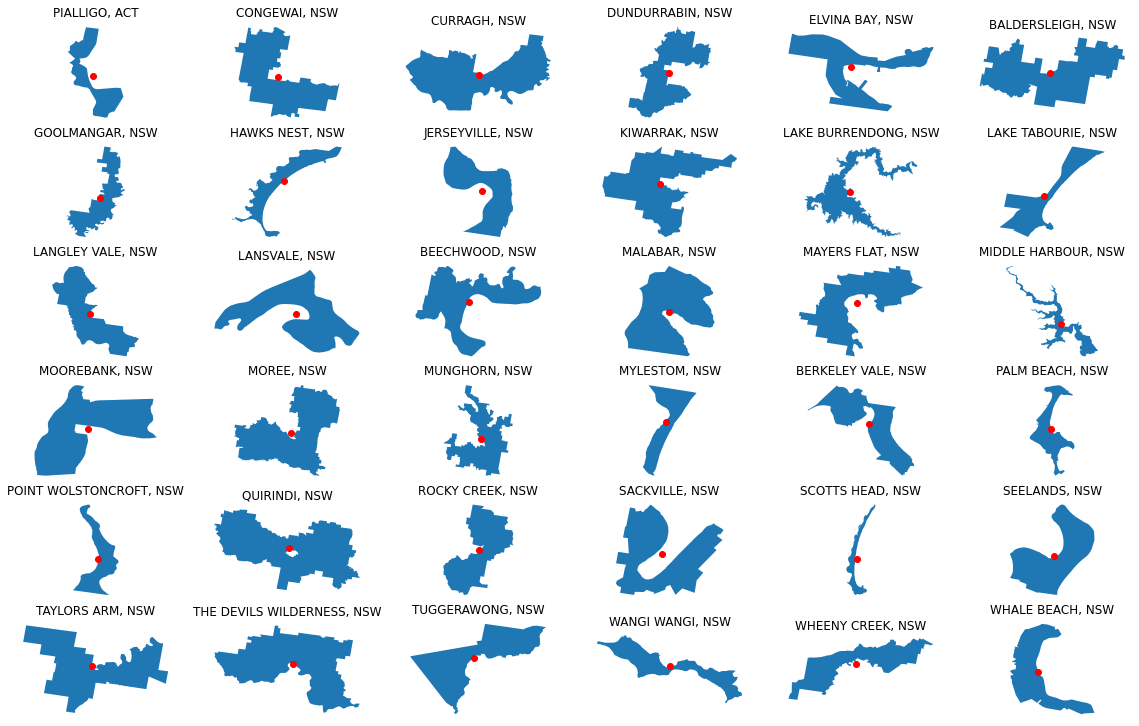

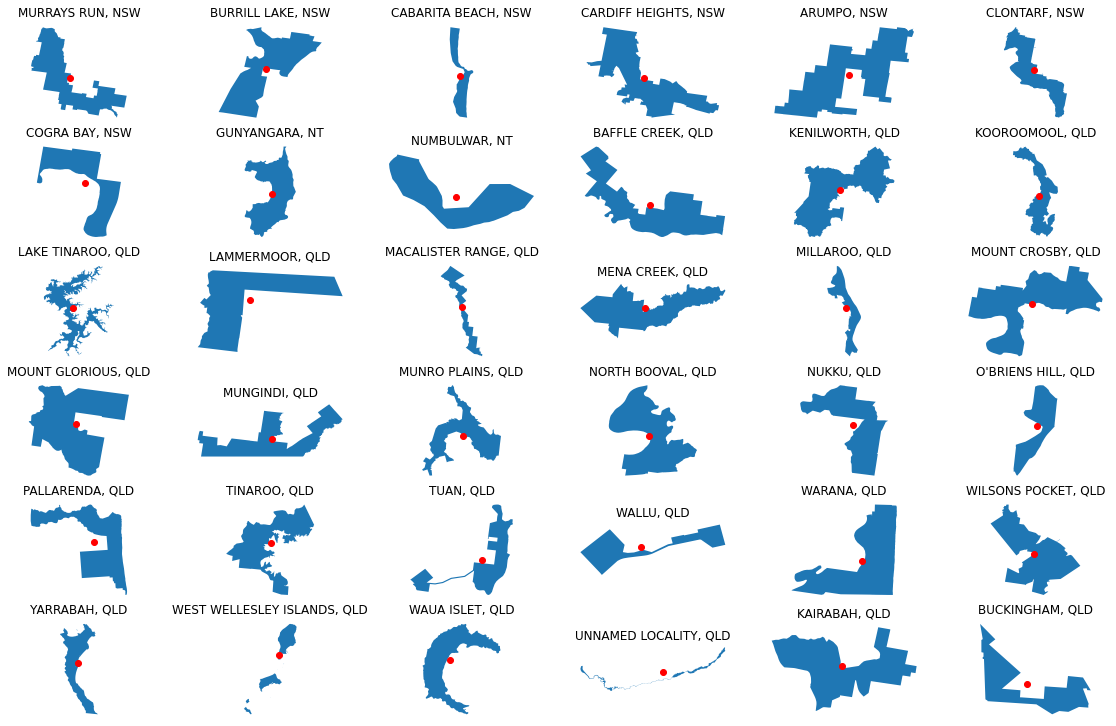

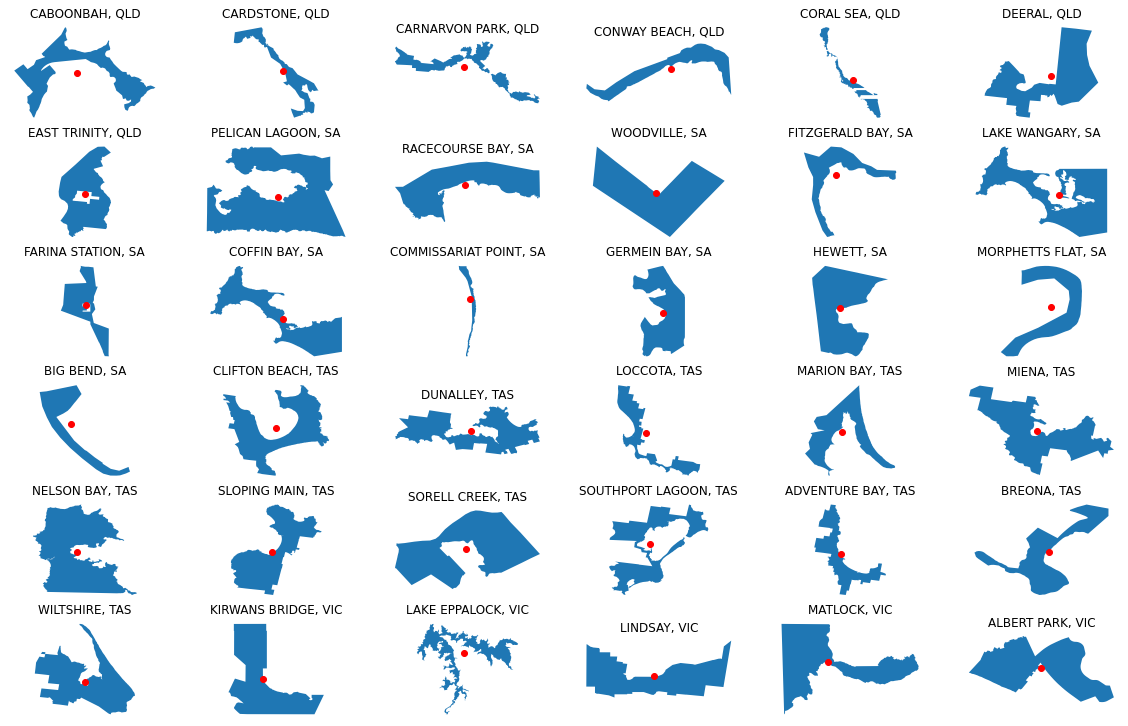

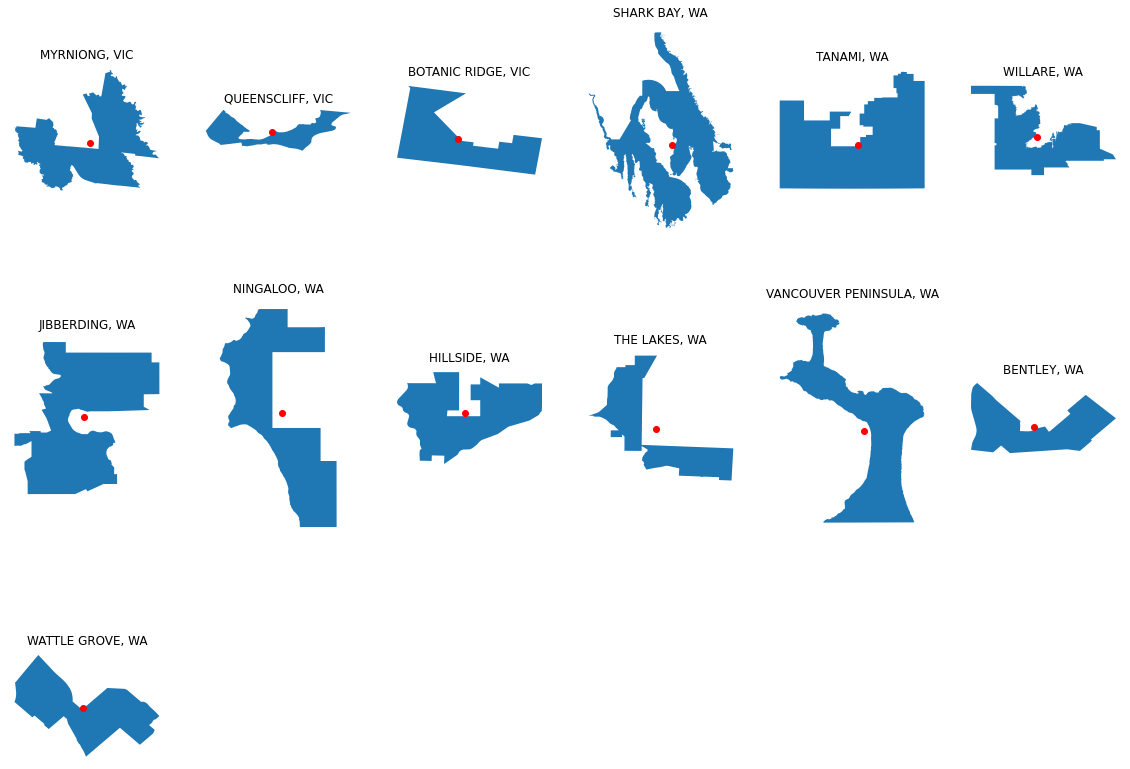

In [236]:
# Suburbs with centroid outside itself
non_fixed_point_local_gdf = suburbs_2_gdf[~suburbs_2_gdf.contains(suburbs_2_gdf['centroid'])].copy()

NCOLS = 6
MAX_SUBURBS_PER_FIGURE = 36

chunk_gdf = np.split(
    non_fixed_point_local_gdf,
    np.arange(MAX_SUBURBS_PER_FIGURE, len(non_fixed_point_local_gdf), MAX_SUBURBS_PER_FIGURE)
)

for chunk in chunk_gdf:

    fig = plt.figure(figsize=(20,15))

    # Loop over a GDF of every row

    localities_gdf = np.array_split(
        chunk[:MAX_SUBURBS_PER_FIGURE],
        len(chunk[:MAX_SUBURBS_PER_FIGURE])
    )

    for index, locality in enumerate(localities_gdf):
        ax = fig.add_subplot((len(chunk)//NCOLS)+1, NCOLS, index+1)
        locality.plot(ax=ax)
        ax.set_axis_off()

        ax.plot(
            locality.iloc[0].centroid_lng,
            locality.iloc[0].centroid_lat,
            marker='o',
            markersize=6,
            color='red',
        )

        suburb_name = locality.iloc[0].loca_2
        state_name = locality.iloc[0].state_name
        ax.set_title('%s, %s' % (suburb_name, state_name))

    plt.show()
